# Random

The generation of random values and random distributions is a common task in data science. NumPy's `random` module allows us to perform these operations.

In [1]:
import numpy as np

## Random generator

The recommended way of generating random values and distributions is with a `Generator`. We can construct a `Generator` using the `numpy.random.default_rng()` function.

In [2]:
rng = np.random.default_rng()
print(rng)

Generator(PCG64)


## Random data

An instance of `Generator` provides methods to generate random data.

The `size` parameter in these methods is the shape of the output array. If `size` is `None` or not given, a single value will be returned.

`numpy.random.Generator.integers(low, high, size)` returns random integers between `low` and `high` (inclusive of `low` but not of `high`).

In [3]:
print(rng.integers(1, 10))  # including 1 but excluding 10
print(rng.integers(1, 10, size=(2, 3)))

5
[[2 2 7]
 [7 9 1]]


`numpy.random.Generator.random(size)` returns numbers in interval `[0.0, 1.0)`

In [4]:
print(rng.random())
print(rng.random((4, 3)))

0.2753901250487497
[[0.384129   0.99912568 0.66319451]
 [0.57235992 0.94340356 0.24892358]
 [0.39517788 0.16240803 0.35924913]
 [0.56559328 0.94216592 0.66002703]]


`numpy.random.Generator.choice(a, size, replace, p)` randomly chooses values from `a`
* The `replace` argument indicates whether the sample is with replacement. If `True` (default), a value can be selected multiple times.
* The `p` argument specifies the probabilities of selecting each element in the array/list. If not specified, the distribution will be uniform.

In [5]:
print(rng.choice([1, 2]))

print(rng.choice([1, 2, 3, 4, 5, 6], size=(2, 3)))
print(rng.choice([1, 2, 3, 4, 5, 6], size=(2, 3), replace=False))
print(rng.choice([1, 2, 3], size=(2, 3), p=[0.1, 0.1, 0.8]))

print(rng.choice(["A", "B"], p=[0.9, 0.1]))

2
[[1 5 1]
 [5 3 1]]
[[1 5 6]
 [3 2 4]]
[[3 1 3]
 [3 3 3]]
A


## Shuffling

* `numpy.random.Generator.permutation()` shuffles an array and **returns a copy**
* `numpy.random.Generator.shuffle()` shuffles an array **in-place** (returns `None`)

In [6]:
arr = np.arange(10)
print(arr)
print(rng.permutation(arr))
print(arr)

print()

arr = np.arange(10)
print(arr)
rng.shuffle(arr)
print(arr)

[0 1 2 3 4 5 6 7 8 9]
[8 2 0 6 9 5 4 3 7 1]
[0 1 2 3 4 5 6 7 8 9]

[0 1 2 3 4 5 6 7 8 9]
[3 6 9 0 2 8 5 1 4 7]


## Distributions

One cool advantage of using NumPy to perform random generation is its ability to draw samples from many distributions. Here are a few of the many.

In [7]:
print(rng.normal(3, 0.5, 2))     # mean, stdev, size
print(rng.binomial(10, 0.5, 5))  # n, p, size
print(rng.geometric(0.3))        # p, size (not given here)
print(rng.chisquare(5, 4))       # df, size

[3.21708958 2.8064033 ]
[5 6 8 5 6]
4
[10.0946915  12.67267173  2.01794228  1.33027807]


As a bonus, let's plot some distributions for fun.

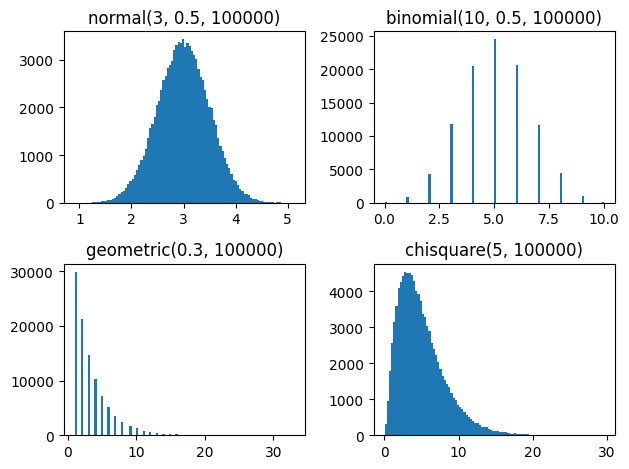

In [8]:
import matplotlib.pyplot as plt

plt.subplot(2, 2, 1)
plt.hist(rng.normal(3, 0.5, 100000), 100)
plt.title("normal(3, 0.5, 100000)")

plt.subplot(2, 2, 2)
plt.hist(rng.binomial(10, 0.5, 100000), 100)
plt.title("binomial(10, 0.5, 100000)")

plt.subplot(2, 2, 3)
plt.hist(rng.geometric(0.3, 100000), 100)
plt.title("geometric(0.3, 100000)")

plt.subplot(2, 2, 4)
plt.hist(rng.chisquare(5, 100000), 100)
plt.title("chisquare(5, 100000)")

plt.tight_layout()
plt.show()

## Summary

In today's lesson, we learned about `numpy.random.Generator` and using it to do the following.

1. Generating random data
2. Shuffling data randomly
3. Generating random distributions